In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Lec 10 
## non linear seperable
### 1) 슬랙 2) 커널 function
- 지금은 kernel function

In [3]:
file1="c:/temp/svm_data1.csv"
data1=pd.read_csv(file1)
data1

,X1,X2,y
0,-0.486850,-0.621107,1
1,-1.476004,0.132181,1
2,-0.010911,2.037849,1
3,-0.013760,1.164893,1
4,0.515579,1.049514,1
5,-0.139122,0.329392,1
6,1.287317,0.728701,1
7,-0.587773,0.815217,1
8,-0.030600,0.882825,1
9,-2.196844,-0.021392,1


In [4]:
# non linear hyperplane : gaussain rbf
X=data1[['X1','X2']]
y=data1['y']
svc3=SVC(C=0.1,kernel='rbf',gamma='scale',random_state=0)
# gamma 지정해주지 않으면 자동으로 'scale' 사용됨
# gamma = 'auto' (x 변수의 역수, 지금의 경우 1/2일 것) 로 지정할 수도 있음.
result3=svc3.fit(X,y)
result3

SVC(C=0.1, random_state=0)

In [5]:
pred3=result3.predict(X)
pred3

array([ 1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

In [6]:
confusion_matrix(y,pred3)

array([[10,  0],
       [ 3,  7]], dtype=int64)

In [7]:
# CCR 
(10+7)/20

0.85

In [8]:
# non linear hyperplane: polynomial kernel
X=data1[['X1','X2']]
y=data1['y']
svc4=SVC(C=0.1,kernel='poly',degree=3,random_state=0)
result4=svc4.fit(X,y)
pred4=result4.predict(X)
confusion_matrix(y,pred4)

array([[5, 5],
       [1, 9]], dtype=int64)

In [9]:
# CCR polynomial function
(9+5)/(9+5+5+1)

0.7

# Lec 11 K-means Clustering 
## unsupervised learning : y가 없다
## x가 연속형일 때 사용
- 중심점을 k개 지정하고, 그 점 지정 과정 이동시키면서 여러번 반복한다. 
- 그 과정에서 중심점과 원래 점들 까지의 거리 의 합들의 평균이 최저가 될 때가 최적 상태 
    - MSE가 최저일때
    - Euclidean distance 
        - 점~중심점 까지의 거리 = dissimilarity
- 고객A와 4개의 중심점과의 ED를 모두 계산한다.
- 나머지 모든 고객에 대해서도 같은 방식으로 4개의 중심점과의 ED를 계산
- 각 고객에 대해 최소 ED를 가진 중심점을 선택한다.
- 최적 중심점 어케 찾음?
    - 각 고객에 할당된 eD의 합이 최소화 되도록 4개 중심점 위치 찾아야 함. 
    - 합이 최소=평균 ED가 최소
    - WSS가 최소
    - 평균 거리가 확 줄어들고 그 뒤부터 잘 안줄어드는 그 지점 : Elbpw
    - 평균 거리 줄이겠다고 중심점 k개를 무작정 늘이면 군집화의 의미가 없음
    

In [10]:
file2="c:/temp/psysed.csv"
psysed=pd.read_csv(file2)
psysed

,id,flexibility,speed,strength
0,1,3.600000,6.11,2.07
1,2,1.120000,0.33,9.01
2,3,8.690000,8.90,3.83
3,4,2.670000,8.61,0.36
4,5,2.780000,1.69,8.64
...,...,...,...,...
75,76,2.440000,1.60,8.51
76,77,2.340000,1.66,8.91
77,78,5.080000,1.05,5.46
78,79,1.670000,0.87,8.70


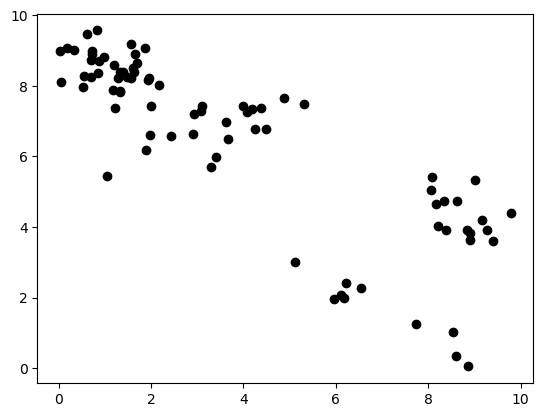

In [11]:
# x 변수 3개 중 두 개만 사용해서 2차원 공간에서 clustering
plt.scatter(psysed['speed'],psysed['strength'],color='black')
plt.show()

In [12]:
X=psysed[['speed','strength']]
X_scaled=StandardScaler().fit_transform(X)
X_scaled
# 표준화 이유 : 너무 큰(작은) 한 변수에 확 치우치면 예측 흐릴 수 있다.

array([[ 0.72019914, -1.79539379],
       [-1.1430587 ,  1.05595396],
       [ 1.6195916 , -1.07228546],
       [ 1.52610638, -2.49795922],
       [-0.70464507,  0.90393691],
       [-0.64339614,  1.08060518],
       [ 1.59702629, -1.03941681],
       [ 1.38104308, -0.73538263],
       [ 1.34558329, -0.57103978],
       [-0.61760711,  0.73548521],
       [-0.64017251, -0.10266284],
       [-0.74332862,  0.72726828],
       [ 1.90649475, -0.84220553],
       [ 0.66862098, -1.83647945],
       [-0.25656064,  0.34927983],
       [-0.15018081, -0.18894285],
       [ 1.35525408, -0.41902273],
       [ 1.65505171, -0.45189125],
       [-0.18564076, -0.30809134],
       [ 0.46553245,  0.43145115],
       [-0.82391936,  0.56703412],
       [-0.86905024,  0.58757685],
       [-0.97542997,  0.7888967 ],
       [-1.04957345,  1.24905647],
       [ 1.45196303, -1.03941681],
       [-0.08248465,  0.22602264],
       [ 0.19797108,  0.14385133],
       [ 0.75565897, -1.65570232],
       [ 1.60992081,

- unsupervised learning 이라서 예측 성과 y 보는게 없다.

### unsupervised learning; clustering 에서 알아야 할 것
1) 각 id가 그룹 어디에 속해있는 지

2) 중심점의 위치 -> 이것으로 거리를 계산할 수 있다.

3) elbow 찾기 
    - Within Sum of squares = 평균거리 
    - 확 줄 때 그리고 그 이후에 안 줄 때 elbow이다.

In [13]:
# clustering 하기, k=3
kmeans_3=KMeans(n_clusters=3,random_state=0,n_init=10,max_iter=300)
# max_iter: 300 번 옮겨가기
kmeans_3.fit(X,y)

KMeans(n_clusters=3, random_state=0)

In [14]:
# WSS, k=3
kmeans_3.inertia_

145.70898465322134

In [15]:
# 중심점의 위치, k=3
kmeans_3.cluster_centers_

array([[1.14485715, 8.47885705],
       [8.04119999, 3.27120002],
       [3.44850002, 6.83249999]])

In [16]:
kmeans_3.labels_

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1])

In [17]:
df1=pd.DataFrame(kmeans_3.labels_,columns=['cluster_3'])
df1

,cluster_3
0,1
1,0
2,1
3,1
4,0
...,...
75,0
76,0
77,2
78,0


In [18]:
psysed_new=pd.concat([psysed,df1],axis=1)
psysed_new

,id,flexibility,speed,strength,cluster_3
0,1,3.600000,6.11,2.07,1
1,2,1.120000,0.33,9.01,0
2,3,8.690000,8.90,3.83,1
3,4,2.670000,8.61,0.36,1
4,5,2.780000,1.69,8.64,0
...,...,...,...,...,...
75,76,2.440000,1.60,8.51,0
76,77,2.340000,1.66,8.91,0
77,78,5.080000,1.05,5.46,2
78,79,1.670000,0.87,8.70,0


In [19]:
pd.value_counts(psysed_new['cluster_3'])

0    35
1    25
2    20
Name: cluster_3, dtype: int64

In [20]:
psysed_new.groupby('cluster_3')[['speed','strength']].mean()

,speed,strength
cluster_3,,
0,1.144857,8.478857
1,8.041200,3.271200
2,3.448500,6.832500


In [21]:
# k=3
kmeans_3.inertia_
#왜이러지

145.70898465322134

In [22]:
# k=4
kmeans_4=KMeans(n_clusters=4, random_state=0,n_init=10,max_iter=300)
kmeans_4.fit(X,y)
kmeans_4.inertia_

82.92927654836562

In [23]:
# k=5
kmeans_5=KMeans(n_clusters=5, random_state=0,n_init=10,max_iter=300)
kmeans_5.fit(X,y)
kmeans_5.inertia_

62.555902924982604